## 6.1 매개변수 갱신
최적화 : 매개변수의 최적값을 찾는 문제
그동안 사용했던 SGD는 매개변수 공간을 무작정 찾는 것보다는 똑똑하지만, 미분을 기준으로 매개변수 값을 몇번이고 갱신해야.

In [17]:
import numpy as np
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

- lr = 학습률
- params, grads는 가중치 매개변수와 기울기를 저장하는 dict 변수

SGD는 단순, 구현 쉬움
그러나 비효율적인 경우가 있음.
-> SGD는 비등방성 함수에서 탐색경로가 비효율적 (비등방성 함수란, 방향에 따라 기울기가 달라지는 함수)
++ SGD가 지그재그로 탐색하는 근본적인 원인이, 기울어진 방향이 본래의 최솟값과 다른 방향을 가리키기 때문

모멘텀을 활용해서 해결할 수 있음

In [18]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

비교적 '지그재그'의 정도가 적음
그러나 y축 방향의 속도는 안정적이지 않음

학습률은 너무 크지도 작지도 않은 값을 가져야 함.
너무 크면 학습이 안되고 너무 작으면 너무 오래 걸림
그래서 처음에 크게 움직이다가 나중에 작게 움직이는 학습률 감소라는 기술이 있음
이를 활용한 AdaGrad 기술
(매개변수 각각에 맞는 맞춤형 학습률 값을 만들어줌)

In [19]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 0으로 나누는 것을 방지하기 위해 1e-7을 더해줌

최소값을 향해 최적화 갱신 경로가 효율적으로 움직임
처음에는 크게 움직이지만, 갱신 강도가 빠르게 약해지고 지그재그 움직임이 줄어듦

Adam 이라는 방법도 있음 -> 모멘텀과 AdaGrad를 합친듯한 방법

어느 갱신 방법을 이용할 것인가?
그림만 보면 adagrad가 가장 우수해보이지만 풀어야할 문제가 무엇인지 따라 달라질 수 있음

## 6.2 가중치의 초깃값
가중치 감소 기법 : 오버피팅을 억제해 범용 성능을 높일 수 있음
즉, 가중치 값을 작게 하여 오버피팅이 일어나지 않게 하는 것
but 가중치를 0으로 두면 안됨 (균일한 값으로 설정하면 안됨)
    -> 순전파 시 두번째 층 노드에 같은 값이 전달 됨
    -> 즉, 두번째 층 가중치가 모두 똑같이 갱신됨 -> 갱신을 거쳐도 여전히 같은 값을 유지함

가중치 초깃값에 따른 은닉층 활성화 값의 변화
=> 5층 신경망에 무작위로 생성한 입력 데이털르 흘리며 각 층의 활성화값 분초를 히스토그램으로 그림

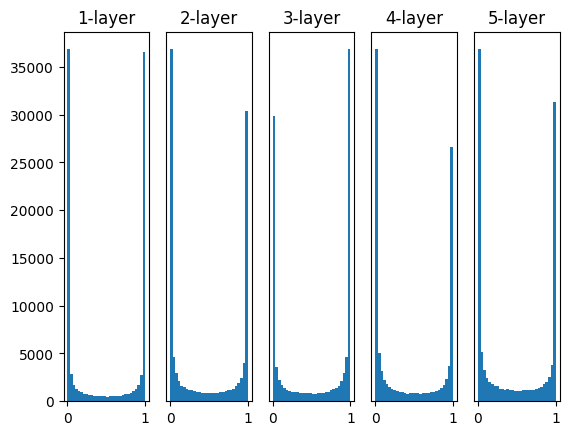

In [20]:
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)

    z = sigmoid(a)
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기값이 작아지다가 사라짐

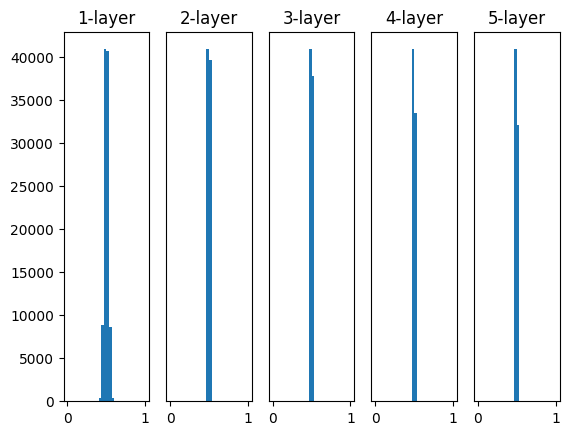

In [21]:
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)

    z = sigmoid(a)
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

표준편차를 0.01로 설정한 정규 분포

-> 대다수의 뉴런이 거의 같은 값을 출력하므로 많은 것이 의미가 없음
-> 활성화 값이 치우치면 표현력을 제한함

Xavier 초기값을 활용 -> 일반적인 딥러닝 프레임워크들이 표준적으로 이용하고 있음
앞층에 노드가 많을수록 대상 노드의 초기값으로 설정하는 가중치가 좁게 퍼짐

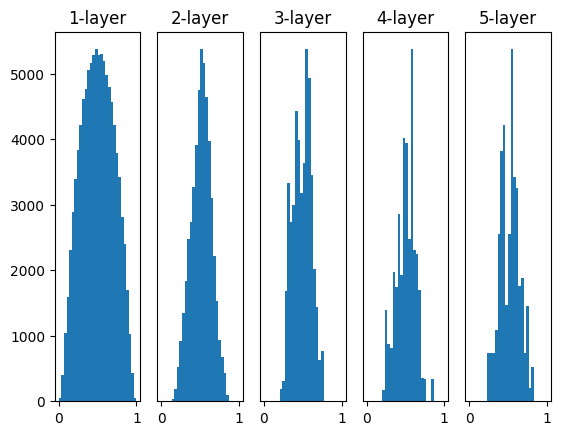

In [22]:
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)

    z = sigmoid(a)
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

조금 일그러지긴 했지만 픙이 깊어지므로 앞에서 본 방식보다는 확실히 넓게 분포됨

Xavier 초기값은 활성화 함수가 선형인 것을 전제로 하기 때문에, 시그모이드나 하이퍼볼릭탄젠트 함수와 같이 중앙 부근이 비교적 선형인 함수에 적당함
ReLU의 경우 특화된 초기값이 다름 -> He 초깃값을 사용함

## 6.3 배치 정규화
각 층의 활성화 값의 분초를 관찰해보며 가중치의 초기값을 적절히 설정하면 각 층의 활성화값 분포가 적당히 퍼지면서 학습이 원활하게 수행됨
배치 정규화 알고리즘 : 
- 학습 속도 개선
- 초기값 선택에 크게 의존하지 않음
- 오버피팅 억제

=> 학습 시 미니 배치를 단위로 정규화 함

배치 정규화의 계층마다 이 정규화된 데이터에 고유한 확대와 이동 변환을 수행함
MNIST 데이터셋에 적용했을 때 배치 정규화 계층을 사용하는 것과 사용하지 않는 것의 차이가 있음
학습이 빨라지며 가중치 초기값에 크게 의존하지 않아도 됨

## 6.4.3 드롭아웃
앞에서 손실함수에 가중치의 L2 노름을 더한 가중치 감소 방법을 활용하였는데,
신경망 모델이 복잡해지면 가중치 감소 만으로는 대응하기 어려우므로 드롭아웃을 활용함

드롭아웃 -> 은닉층 뉴런을 무작위로 골라 삭제하는 것

In [23]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

MNIST 데이터셋에 적용했을 때 훈련데이터와 시험데이터에 대한 정확도 차이가 줄었다는 것을 확인할 수 있음

## 6.5 적절한 하이퍼파라미터 값 찾기
하이퍼파라미터의 성능을 찾을 때 시험 데이터를 사용하면 하이퍼파라미터 값이 시험 데이터에 오버피팅되기 때문에 시험 데이터를 사용하면 안됨
하이퍼파라미터 조정용 데이터는 검증 데이터라고 부름

In [24]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

ModuleNotFoundError: No module named 'dataset'

하이퍼파라미터의 최적값이 존재하는 범위를 조금씩 줄이는 것이 최적화의 핵심

'대략적'으로 지정하는 것이 효과적

하이퍼파라미터를 최적화하는 것은 오랜시간이 걸리므로 나쁠 듯한 값은 일찍 포기하는 것이 좋음

학습률과 가중치 감소의 세기를 조절하는 계수를 탐색할 수 있음

In [ ]:
weight_decay = 10**np.random.uniform(-8, -4)
lr = 10**np.random.uniform(-6, -2)

이렇게 하이퍼파라미터의 범위를 줄여나감